# Homework 2: Part 1

## Exercise 1: PCA
In this exercise we ask you to use PCA to examine the Zillow dataset. How many intrinsic dimensions do there appear to be in the Zillow dataset? Please include code for that would draw a figure that would support your answer as well as a short explanation (100 words or less). 
Note: There is not necessarily one correct answer to this question.

In [3]:
# A bunch of imports in no particular order...
%matplotlib inline
import sklearn.datasets as ds
from sklearn.decomposition import PCA, FastICA
import sklearn.metrics as met
import matplotlib.cm as cm

import sklearn.cluster as cl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import os
os.chdir('C:/Users/Sharon/Desktop/Chapman Spring 2018/Data Mining CS 530/ZillowTrainData')

In [4]:
# a flexible function that plots 3d maps
def plot3D(ds=None, labels=None, comp=None, fig=None, axloc=111, xlim=[-10,10], 
           ylim=[-10,10], zlim=[-10,10], xc=5, yc=5, zc=5):    
    if fig is None:
        fig = plt.figure()
    ax = fig.add_subplot(axloc, projection='3d')
    colors = ('red', 'blue', 'green', 'yellow', 'cyan', 'black', 'purple', 'gray')
    cmap = ListedColormap(colors[:len(np.unique(labels))])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_zlim(zlim)
    if ds is not None:
        if labels is not None:
            ax.scatter(ds[:, 0], ds[:, 1], ds[:, 2], marker='.', 
                       alpha=1, lw=0, c=cmap(labels))
        else:
            ax.scatter(ds[:, 0], ds[:, 1], ds[:, 2], marker='.', 
                       alpha=1, lw=0)
    
    if comp is not None:
        # add principal components here:
        for i in np.arange(len(comp)):
            ax.plot([-xc*comp[i, 0], xc*comp[i, 0]],
                    [-yc*comp[i, 1], yc*comp[i, 1]],
                    zs=[-zc*comp[i, 2], zc*comp[i, 2]])

    return fig, ax

In [5]:
# Examine Zillow dataset
df = pd.read_csv('properties_2016.csv', dtype={'hashottuborspa': str, 'propertycountylandusecode': str, 'propertyzoningdesc': str, 'fireplaceflag': str, 'taxdelinquencyflag': str})
labels = pd.read_csv('train_2016.csv')

train_df = df.set_index("parcelid")\
  .join(labels.set_index("parcelid"))\
  .dropna(subset=["logerror"])\

train_df.head()

,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
parcelid,,,,,,,,,,,,,,,,,,,,,
10711738,1.0,NaN,NaN,3.0,4.0,NaN,4.0,3.0,NaN,NaN,...,245180.0,567112.0,2015.0,321932.0,7219.18,NaN,NaN,6.037113e+13,0.0276,2016-08-02
10711755,1.0,NaN,NaN,3.0,3.0,NaN,4.0,3.0,NaN,NaN,...,254691.0,459844.0,2015.0,205153.0,6901.09,NaN,NaN,6.037113e+13,-0.0182,2016-08-02
10711805,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,...,235114.0,384787.0,2015.0,149673.0,4876.61,NaN,NaN,6.037113e+13,-0.1009,2016-05-03
10711816,1.0,NaN,NaN,2.0,4.0,NaN,4.0,2.0,NaN,NaN,...,262309.0,437176.0,2015.0,174867.0,5560.07,NaN,NaN,6.037113e+13,-0.0121,2016-04-05
10711858,1.0,NaN,NaN,2.0,4.0,NaN,4.0,2.0,NaN,NaN,...,232037.0,382055.0,2015.0,150018.0,4878.25,NaN,NaN,6.037113e+13,-0.0481,2016-07-15


In [6]:
x = train_df.dropna(axis=1).drop(["assessmentyear", "logerror", "transactiondate"], axis=1)
y = train_df.dropna(axis=1)["logerror"]

(90275, 9) (90275, 9)


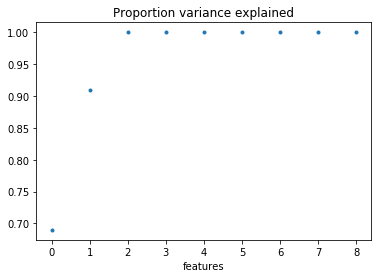

In [7]:
pca = PCA()
X_pca = pca.fit_transform(x)

plt.plot(np.cumsum(pca.explained_variance_ratio_), '.')
plt.title("Proportion variance explained")
plt.xlabel("features")
print(x.shape, X_pca.shape)

After performing a PCA analysis, and creating a scree plot, the elbow occurs at features = 2. The scree plot also shows that 2 principle components explain 99% of the variance.

## Exercise 2: KMeans
You are given a dataset (find_k.csv) and are instructed to find the number of clusters in the datast using Kmeans with Python. You are told that there are at most 10 clusters in this dataset. Import the data using pandas (no special options necessary). And include a figure or function that generates a figure to support your claim for the correct number of clusters in the dataset.

In [8]:
import os
os.chdir('C:/Users/Sharon/Desktop/Chapman Spring 2018/Data Mining CS 530/Homework')

In [9]:
dataset = pd.read_csv('find_k.csv')
dataset.head()


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,9.704848,5.397793,4.520424,-2.078480,1.859037,0.495643,-1.903721,9.047582,-1.388622,1.213666,...,-0.885365,6.339902,-1.159672,-0.215826,0.521329,0.967488,5.202746,1.716973,4.188917,0.555282
1,4.066355,-3.349334,-3.820159,1.459617,-0.182684,-1.001178,0.152685,0.528453,-0.966054,0.540250,...,0.949803,-4.001163,0.223592,-1.067011,0.139921,-4.820059,-2.390962,0.158804,-4.785182,0.338800
2,1.009848,-1.101371,-5.199355,-1.684258,0.898301,0.408796,1.812307,5.896797,-0.239960,-0.280822,...,0.949109,1.115009,-0.895640,1.297246,-1.309368,-3.756467,-2.584734,0.450612,6.962365,-0.018166
3,-2.630869,0.598904,0.252177,-3.793096,-0.451023,-0.754058,-1.308820,-3.945642,0.067265,-0.349544,...,0.033225,-0.240269,-1.309211,2.058761,-0.841023,3.712841,2.016710,0.199500,-4.697538,1.168533
4,1.365747,2.766126,-4.347158,3.517428,-1.316255,0.260311,-0.973643,-1.619506,0.070865,1.451622,...,-0.359251,-2.295692,1.368073,1.006009,0.136901,7.036958,-1.345382,0.264137,0.539657,-1.341600


(<matplotlib.figure.Figure at 0xd9ff7f4fd0>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0xd9fb35bc18>)

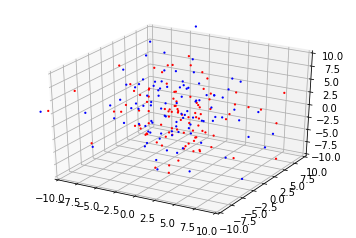

In [10]:
x = dataset.values
y = np.hstack([np.zeros(dataset.shape[1]), np.ones(dataset.shape[1])])

plot3D(x, y)

In [15]:
dataset.shape[1]

100

For n_clusters = 2 The average silhouette_score is : 0.0268982922019


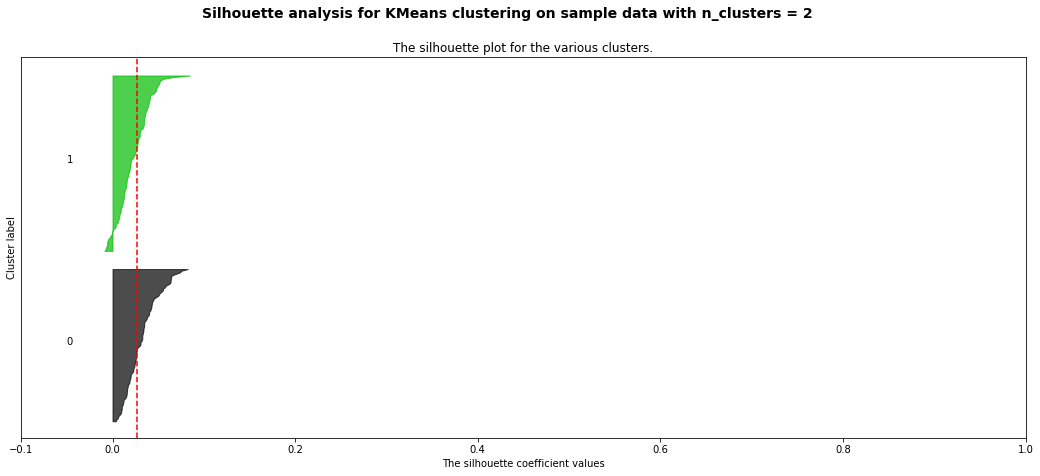

For n_clusters = 3 The average silhouette_score is : 0.0260003382986


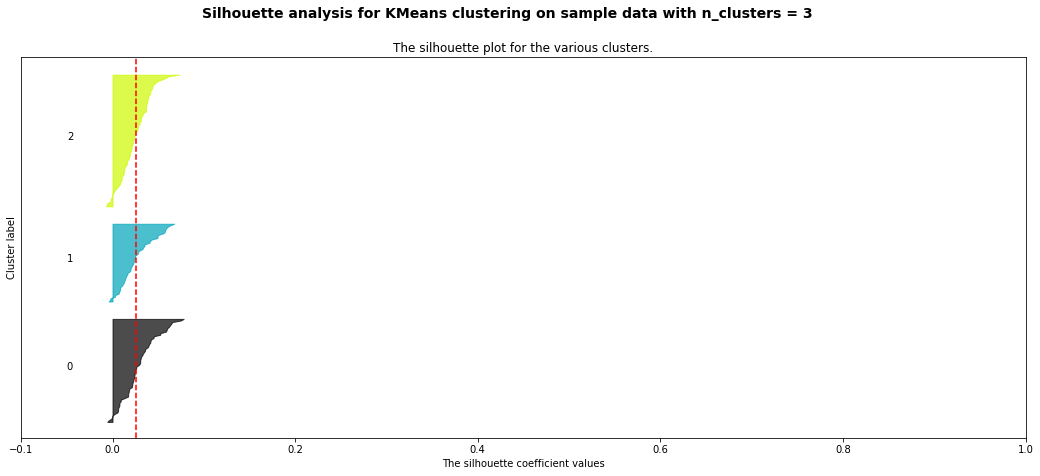

For n_clusters = 4 The average silhouette_score is : 0.022031795306


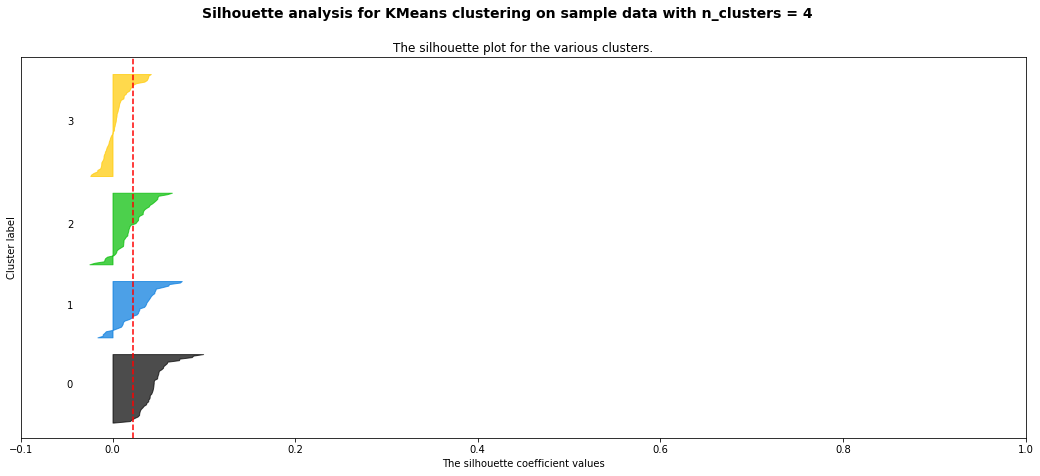

For n_clusters = 5 The average silhouette_score is : 0.0239882448629


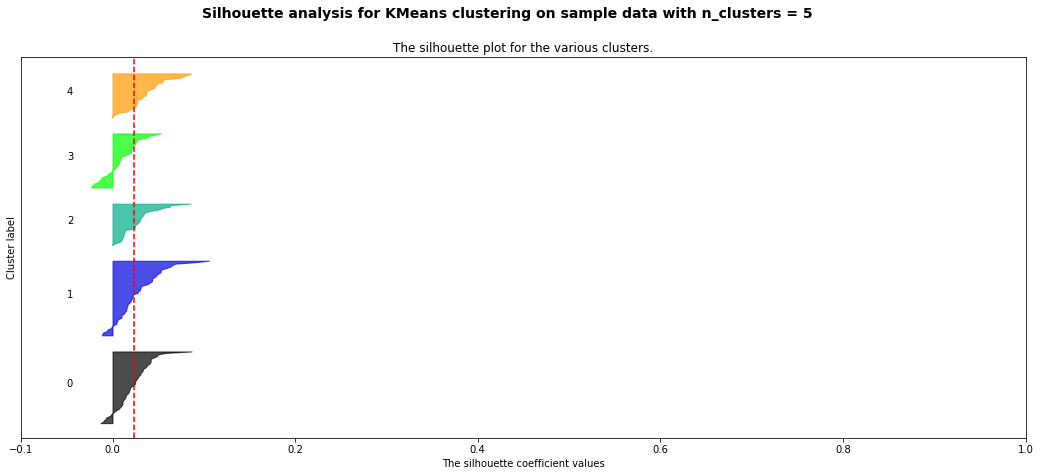

For n_clusters = 6 The average silhouette_score is : 0.016735827911


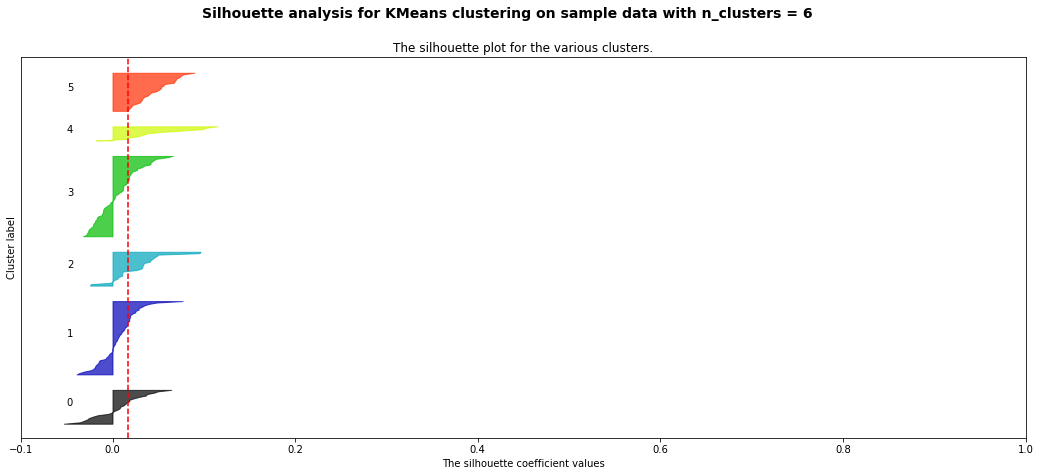

For n_clusters = 7 The average silhouette_score is : 0.0141681214983


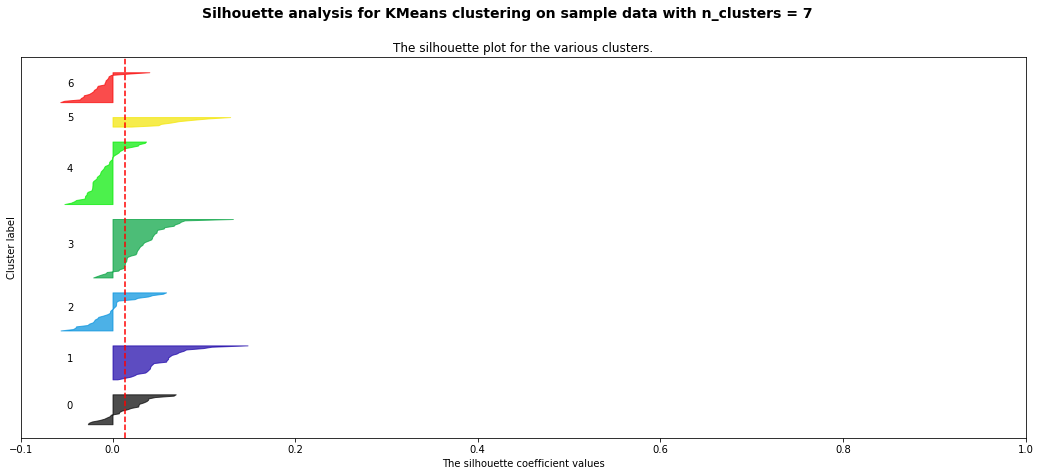

For n_clusters = 8 The average silhouette_score is : 0.0249461547119


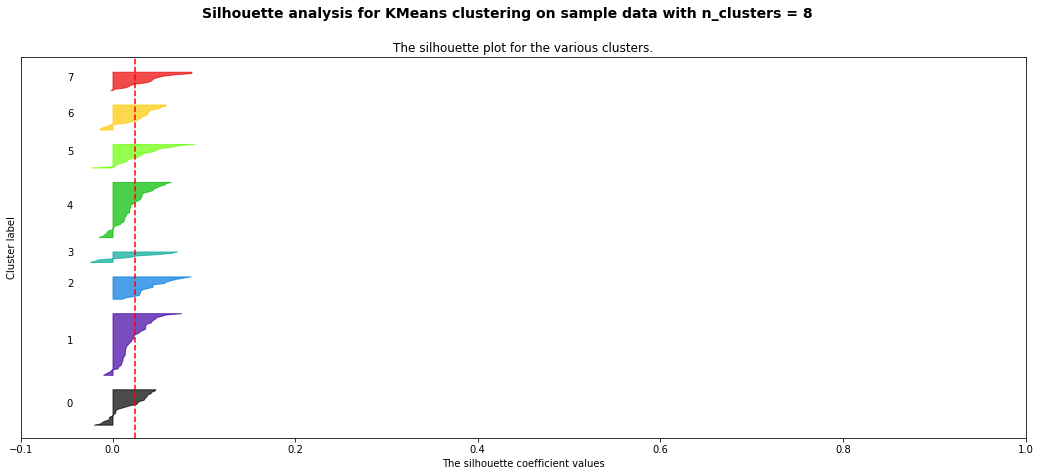

For n_clusters = 9 The average silhouette_score is : 0.0170491070656


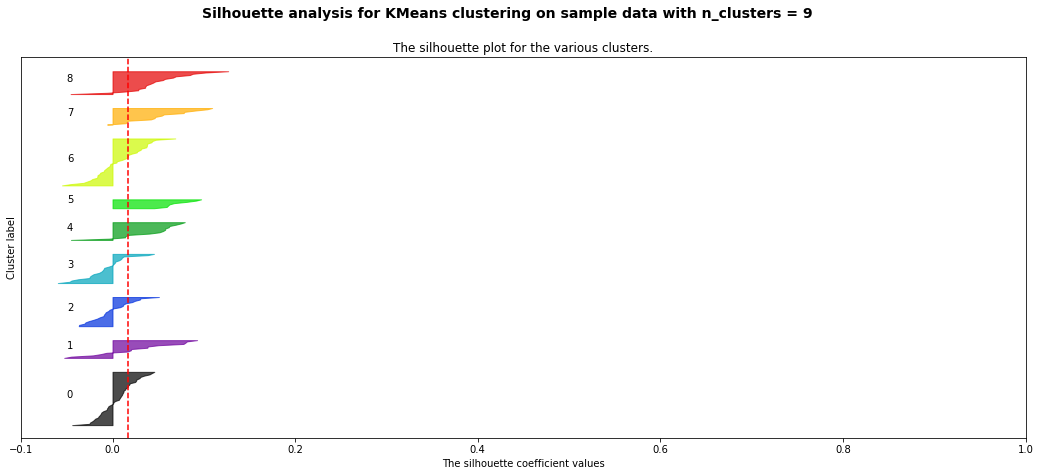

For n_clusters = 10 The average silhouette_score is : 0.0238528224242


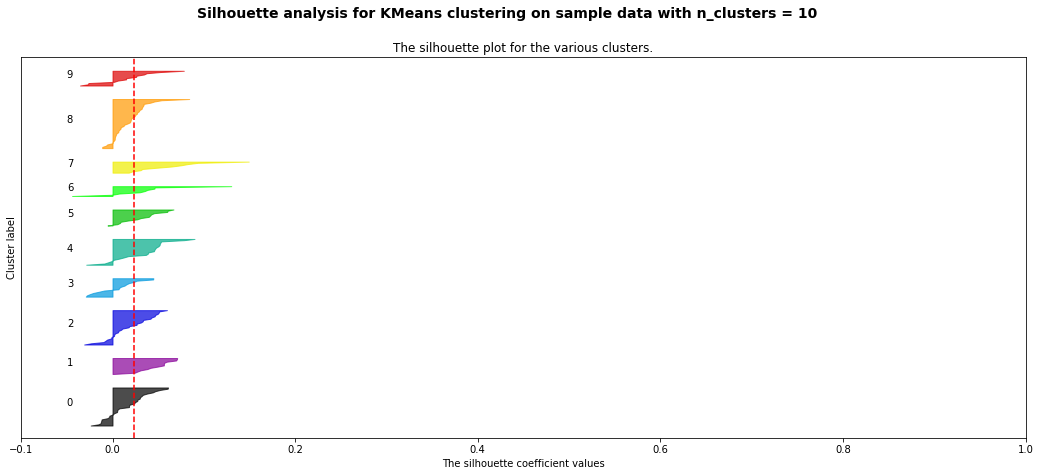

In [14]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

silhouette_avgs=[]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    
    silhouette_avgs.append(silhouette_avg)
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

The best number of clusters are 2
Silhouette score: 0.026898292201934796


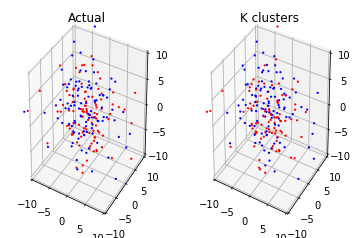

In [15]:
#Define correct number of clusters in the dataset
best_cluster = 2+ silhouette_avgs.index(max(silhouette_avgs))

km = cl.KMeans(n_clusters=best_cluster,random_state=10)
km.fit(x)
pred = km.predict(x)
# equivalent to running .fit_predict(x)

f = plt.figure()
f, ax = plot3D(x, y, fig=f, axloc=121)
ax.set_title("Actual")
f, ax = plot3D(x, pred, fig=f, axloc=122)
ax.set_title("K clusters")

sil_score = met.silhouette_score(x, pred)  # silhouette score implemented in sklearn
print("The best number of clusters are {}".format(best_cluster))
print("Silhouette score: {}".format(sil_score))

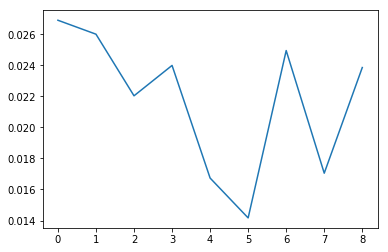

In [20]:
plt.plot(silhouette_avgs)
# where 0 = 2 and 8=10.

k means
for a given k, we want to minimize the variation within each cluster.
We want to minimize the squared Euclidean distance within each cluster.

The k-means clustering uses centroids to delineate clusters. C = sum(from i=1 to m) of vector x / m

dimensionality reduction methods: feature selection, PCA, LDA(Linear Discriminant Analysis)
finds linear combinations of variables that explain the maximal amount of variance in the data.
PCA finds an alternative vector basis for the data, where the 1st dimension explains the maximal amount of variance in the 
data, the 2nd dimension explains the maximal amount of variance left to explain, and so on.
the first principal component is the normalized linear combination of the
features resulting in the maximal variance: z = vector x * vector sigma. limit sigma to be -1 < sigma < 1
    
computing principal components: diagonalizing C (positive semidefinite ) = V * eigenvalues * V

Linear Discriminant Analysis (LDA) models each category (class) as a
multivariate Gaussian distribution with equal variances and uses Bayes’
Theorem to estimate probabilities.
Fischer’s linear discriminant is a variety of LDA that uses projection to
reduce dimensionality and aid in separating categories.

With 2 features and 3 classes, LDA models the distributions for each class as separate
multivariate Gaussian functions, with the 95% probabilities indicated by the ovals on the
left. The dashed lines are the optimal probabilities (which we know because we know the
generative model). This determines decision boundaries, indicated by the solid lines on
the right.